# Linear Regression
- Using numpy.linalg functions inv & solve
- Using sklearn linear_model -> LinearRegression, SGDRegressor
- Implementing Linear Regression using
    - Gradient Descent
    - Stochastic Gradient Descent
## Week 4: UCSD Machine Learning Fundamentals

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model, datasets

In [27]:
X, y = datasets.make_regression(n_features=10)
X = np.insert(X, 0, np.ones(len(X)), axis=1)


In [18]:
X = np.random.normal(size=120).reshape(30, 4)
X = np.insert(X, 0, np.ones(len(X)), axis=1)
# first element is the intercept & remaining are the weights
w_actual = np.array([5, 4, 3, 7, 2])
y = np.dot(w_actual, X.T) + np.random.normal(loc=0, scale=1, size=30)

In [19]:
np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))

array([4.99507686, 4.13093074, 2.97061341, 6.86737782, 2.27010638])

In [20]:
np.linalg.solve(X.T@X, X.T@y)

array([4.99507686, 4.13093074, 2.97061341, 6.86737782, 2.27010638])

In [28]:
fit2 = linear_model.LinearRegression().fit(X, y)
fit2.intercept_, fit2.coef_

(-1.4210854715202004e-14,
 array([ 0.        , 70.94604844, 56.2779768 , 47.67226981, 55.0659645 ,
        74.9489152 , 98.57371361, 11.85586911, 74.73910747, 58.24267858,
        26.99501495]))

In [22]:
lrsgdr = linear_model.SGDRegressor(eta0=0.001, max_iter=300, learning_rate='constant')
lrsgdr.fit(X, y)
lrsgdr.intercept_, lrsgdr.coef_

(array([2.4740168]),
 array([2.47289274, 3.91698187, 2.95483347, 6.6968729 , 2.38972045]))

In [31]:
class GradientDescent(object):
  def __init__(self, method='LSE', eta=0.01, maxiter=300, precision=0.001):
    self.eta = eta
    self.maxiter = maxiter
    self.precision = precision
    self.method = method

  def fit(self, X, y):
      precision = np.full((X.shape[1], ), self.precision)
      self.w_ = np.zeros((X.shape[1], ))
      diff = 1
      self.errors_ = []
      self.iteration_ = 0
      # Least Squared Error
      if self.method == 'LSE':
        gradient = "-2 * X.T.dot(y - np.dot(self.w_, X.T))"
      # Mean Squared Error
      elif self.method == 'MSE':
        gradient = "-2 * X.T.dot(y - np.dot(self.w_, X.T))/len(X)"
      else:
        gradient = "-2 * X.T.dot(y - np.dot(self.w_, X.T))"
      while ((diff > precision).any() and self.iteration_ < self.maxiter):
        w_previous = self.w_
        # i = np.random.permutation(len(X))
        # y = y[i]
        # X = X[i]
        self.w_ = self.w_ - self.eta * eval(gradient)
        diff = abs(self.w_ - w_previous)
        self.errors_.append(diff)
        self.iteration_ = self.iteration_ + 1

      self.errors_ = np.array(self.errors_)
      return self


Gradient Descent Algorithm-Linear Regression Loss Function
Total iterations:83
Minima of loss function occurs at w=[2.71529045e-03 7.09458657e+01 5.62690561e+01 4.76743584e+01
 5.50718289e+01 7.49485832e+01 9.85709945e+01 1.18510666e+01
 7.47346665e+01 5.82401832e+01 2.69919554e+01]


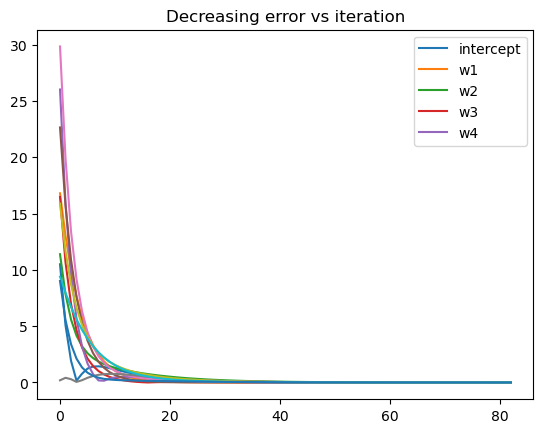

In [32]:
# Learning rate for Mean Squared Error(MSE)
# eta = 0.1
# learning_rate for Least Squared Error(LSE)
# eta = 0.01
gda = GradientDescent(method='LSE', eta=0.001)
gda.fit(X, y)
print(f'Gradient Descent Algorithm-Linear Regression Loss Function')
print(f'Total iterations:{gda.iteration_}')
print(f'Minima of loss function occurs at w={gda.w_}')
plt.title('Decreasing error vs iteration')
plt.plot(range(gda.iteration_), gda.errors_)
plt.legend(['intercept', 'w1', 'w2', 'w3', 'w4'])
plt.show()

In [12]:
class StochasticGradient(object):
    def __init__(self, method='LSE', eta=0.01, maxiter=300, precision=0.001):
        self.method = method
        self.eta = eta
        self.maxiter = maxiter
        self.precision = precision
    
    def fit(self, X, y):
        precision = np.full((X.shape[1], ), self.precision)
        self.w_ = np.zeros((X.shape[1], ))
        diff = 1
        self.errors_ = []
        self.iteration_ = 0
        # Least Squared Error
        if self.method == 'LSE':
            gradient = "-2 * (xi.dot(yi - np.dot(self.w_, xi)))"
        elif self.method == 'MSE':
            gradient = "-2 * (xi.dot(yi - np.dot(self.w_, xi)))/len(X)"
        else:
            gradient = "-2 * (xi.dot(yi - np.dot(self.w_, xi)))"
        while ((diff > precision).any() and self.iteration_ < self.maxiter):
            w_previous = self.w_
            i = np.random.permutation(len(X))
            for xi, yi, in zip(X[i], y[i]):
                self.w_ = self.w_ - self.eta * eval(gradient)
            diff = abs(self.w_ - w_previous)
            self.errors_.append(diff)
            self.iteration_ = self.iteration_ + 1
        
        self.errors_ = np.array(self.errors_)
        return self

Stochastic Gradient Descent Algorithm-Linear Regression Loss Function
Total iterations:133
Minima of loss function occurs at w=[5.3561273  4.31132748 3.16935141 7.09268376 1.81746875]


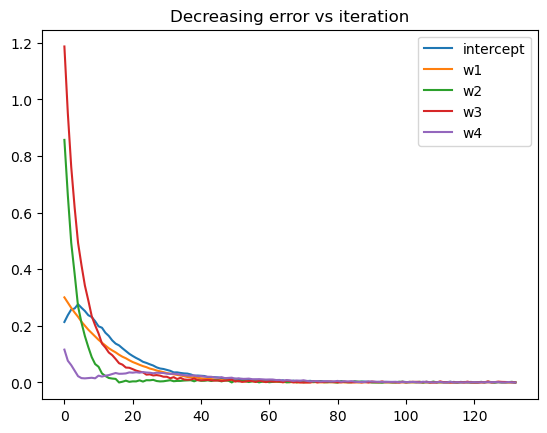

In [13]:
# Learning rate for MSE
# eta = 0.1
# learning_rate for LSE
# eta = 0.002
sgd = StochasticGradient(method='LSE', eta=0.002)
sgd.fit(X, y)
print(f'Stochastic Gradient Descent Algorithm-Linear Regression Loss Function')
print(f'Total iterations:{sgd.iteration_}')
print(f'Minima of loss function occurs at w={sgd.w_}')
plt.title('Decreasing error vs iteration')
plt.plot(range(sgd.iteration_), sgd.errors_)
plt.legend(['intercept', 'w1', 'w2', 'w3', 'w4'])
plt.show()

In [ ]:
rr = linear_model.Ridge(alpha=0.5)
rr.fit(X[:, 1:], y)
rr.intercept_, rr.coef_, 

In [ ]:
lasso_regression = linear_model.Lasso(alpha=0.5)
lasso_regression.fit(X[:, 1:], y)
lasso_regression.intercept_, lasso_regression.coef_, 

In [ ]:
byr = linear_model.BayesianRidge()
byr.fit(X[:, 1:], y)
byr.intercept_, byr.coef_

In [ ]:
ard = linear_model.ARDRegression()
ard.fit(X[:, 1:], y)
ard.intercept_, ard.coef_

In [ ]:
sgr = linear_model.SGDRegressor()
sgr.fit(X[:, 1:], y)
sgr.intercept_, sgr.coef_